# 04 数据分析与可视化
本讲介绍python中常用的数据分析工具包`pandas`，以及可视化包`matplotlib`。

出于篇幅限制，这里只对常用功能做基本介绍，更多内容可以参考官方文档：

* pandas: https://pandas.pydata.org/docs/index.html
* matplotlib: https://matplotlib.org/stable/index.html

In [ ]:
# 确保相关的包已经安装
%pip install torch pandas numpy matplotlib openpyxl

## 数学基础

$X$和$Y$是2个离散型随机变量，记分布列为$p_X (x)$和$p_Y (y)$，

$(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$是$X$和$Y$的一组观测值/采样/样本，那么有如下定义/结论：

* 期望：$\mathbb{E}[f(X)]=\sum_x f(x) p_X (x)\approx \frac1n \sum_{i=1}^n f(x_i)$，即我们**可以用观测值的平均值来估计期望**

* 均值：$\mu_X=\mathbb{E}[X]$

* 均值的估计：$\hat{\mu}_X= \frac1n \sum_{i=1}^n x_i$，可以证明$\mathbb{E}[\hat{\mu}_X]=\mu_X$（满足这种性质的称为**无偏估计**）

* 方差：$\sigma_X^2=\mathbb{E}[(X-\mu_X)^2]=\mathbb{E}[X^2]-\mu_X^2$

* 方差的估计：有两种常见形式
  * $\hat{\sigma}_X^2=\frac1n \sum_{i=1}^n (x_i-\hat{\mu}_X)^2$，是这组观测值的方差
  * $\hat{\sigma}_X^2=\frac1{n-1} \sum_{i=1}^n (x_i-\hat{\mu}_X)^2$，**注意这里的分母是n-1**，可以证明它是随机变量$X$的方差$\sigma_X^2$的无偏估计

> 注：对于`观测值的方差`、`随机变量的方差`、`随机变量的方差的估计`可以通过如下的例子理解，假设我们抛一枚均匀硬币，正面记为1反面记为0，我们用随机变量$X$表示抛硬币的结果，可以算出$\sigma_X^2=0.25$，这与观测值无关；假设我们抛4次得到 $1,0,1,1$，那么我们可以算出这组观测值的方差为$0.1875$，我们可以用这个数作为$\sigma_X^2$的估计值；衡量一个估计方法的好坏的指标之一是它是否是**无偏的**，即估计值的期望是否等于被估计的对象，在数学上可以证明，将样本方差乘上$\frac{n}{n-1}$才是$\sigma_X^2$的无偏估计，即上述的第二种形式。

* 协方差：$Cov(X,Y)=\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]=\mathbb{E}[XY]-\mu_X\mu_Y$
  
* 协方差的估计：与方差类似，有两种常见形式
  * $\widehat{Cov}(X,Y)=\frac1n \sum_{i=1}^n (x_i-\hat{\mu}_X)(y_i-\hat{\mu}_Y)$，是这组观测值的协方差
  * $\widehat{Cov}(X,Y)=\frac1{n-1} \sum_{i=1}^n (x_i-\hat{\mu}_X)(y_i-\hat{\mu}_Y)$，是$Cov(X,Y)$的无偏估计

* 协方差矩阵：如果有一组随机变量，比如$A,B,C,D$，我们可以画一个4x4的表格，里面填写两两的协方差，称为协方差矩阵

  | | A | B | C | D |
  |-|-|-|-|-|
  |**A**|$Cov(A,A)$|$Cov(A,B)$|$Cov(A,C)$|$Cov(A,D)$|
  |**B**|$Cov(B,A)$|$Cov(B,B)$|$Cov(B,C)$|$Cov(B,D)$|
  |**C**|$Cov(C,A)$|$Cov(C,B)$|$Cov(C,C)$|$Cov(C,D)$|
  |**D**|$Cov(D,A)$|$Cov(D,B)$|$Cov(D,C)$|$Cov(D,D)$|
  

* 熵：$Ent(X)=\mathbb{E}[-\log p_X(X)]=\sum_x - p_X (x)\log p_X (x)$
  
* 熵的估计
  * 根据样本的值估计分布列：$\hat{p}_X(x)=\frac1n |\{x_i|x_i=x,i=1,2,...,n\}|$
  * 估计熵：$\widehat{Ent}(X)=\sum_x - \hat{p}_X (x)\log \hat{p}_X (x)$

## pandas

可以很方便地处理序列/表格类型的数据，在很多语法上与`numpy`类似(二者的数据也可以相互转化)

In [ ]:
# 导入
import pandas as pd
import numpy as np

### 基本对象

* `pd.Series`：存放序列类型的数据，内部元素类型相同
* `pd.DataFrame`：存放表格类型的数据，内部同一列的元素类型相同，不同列可以不同

需要注意的是，上述两个对象都有`索引`的概念，类似于Excel表格最左侧的标号，默认的索引是从0开始递增编号，也可以手动设置其他索引。

In [ ]:
# 从list创建Series
pd.Series([1, 3, 5, np.nan, 6, 8])

上面显示的结果有两列，第一列是自动创建的索引，第二列是我们的数据

In [ ]:
# 也可以是numpy数组

# 创建numpy数组
x=np.array([1, 3, 5, np.nan, 6, 8])
print(x)
print()

# 创建Series
y=pd.Series(x)
print(y)
print()

# 转回numpy数组
z=y.to_numpy()
print(z)

In [ ]:
# 手动设置索引
pd.Series(
    [1, 3, 5, np.nan, 6, 8],
    index=[2,4,6,8,10,12]
)

In [ ]:
# 创建副本

# 下面这样a和b是共享数据的，改任何一个，另一个也会变
a=np.array([1,2,3])
b=pd.Series(a)
a[0]=4
print(a)
print(b)

print()

# 下面创建了一个副本，和原对象不共享数据
b=b.copy()
a[0]=5
print(a)
print(b)

In [ ]:
# 从二维数组创建DataFrame
import pandas as pd
import numpy as np
df=pd.DataFrame(
    data=np.random.randn(6, 4), # 随机生成6行4列的数据
    columns=['A','B','C','D'],   # 每一列的名字
    index = ['q',2,3,4,5,'z']
)
#
df
print(df)

In [ ]:
# 查看每列的名称
df.columns
df.columns[0]

In [ ]:
# 同样可以转numpy
df.to_numpy() #index和colums数据会丢失

In [ ]:
# 也可以创建副本
df.copy()

In [ ]:
# 从字典创建DataFrame，字典的每一项对应一列，每一列的长度要么相同，要么是1（会自动重复）
df=pd.DataFrame(
    {
        # 可以是单个数值
        "A": 1.0,
        # 可以是单个时间戳
        "B": pd.Timestamp("20130102"),#TimeStamp是时间戳
        # 可以是单个字符串
        "C": "foo",
        # 可以是Series
        "D": pd.Series([1,2,3,4]),
        # 可以是numpy数组
        "E": np.array([5,6,7,8]),
    }
)
#
df

In [ ]:
# 添加一列（类似字典）
df['G']=[1,2,3,4]
df

In [ ]:
# 查看每一列的类型
df.dtypes

### 查看数据

In [ ]:
# 创建一个很长的表格
df=pd.DataFrame(
    data=np.random.randn(1000, 4),  # 随机生成1000行4列的数据
    columns=['A','B','C','D']       # 每一列的名字
)

In [ ]:
# 查看前3行
df.head(3)

In [ ]:
# 查看后3行
df.tail(3)

In [ ]:
# 查看基本统计数据
df.describe() 

### 索引

In [ ]:
# 创建示例表格
df=pd.DataFrame(
    data=np.random.randn(6, 4),                 # 随机生成6行4列的数据
    columns=['A','B','C','D'],                  # 每一列的名字
    index=pd.date_range("20240101", periods=6)  # 以日期为索引
)
#
df

In [ ]:
# 按列的名称索引
df['A']

In [ ]:
# 按行索引
df[1:3]

In [ ]:
df1= pd.DataFrame(
    [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12]],
     columns = [1,2,3,4]
)
print(df1)
df1[1:3]
df1[1:2]

In [ ]:
# 按行/列的名称索引
# 类似numpy，第一维索引是行，第二维索引是列

# 选中一行
print(df.loc['20240101']) #第一个是行的名称，第二个是列的名称
print()

# 选中一列
print(df.loc[:,'A'])
print()

# 选中矩形区域
print(df.loc['20240101':'20240103','A':'C']) # 注意：这里是左闭右闭
print()

# 选择多列
print(df.loc[:,['B','D']])
print(df.loc[:,'B':'D'])

In [ ]:
# 按行/列的下标索引
# 和上面的类似，只是把名称换成了下标(数字下标)
print(df.iloc[0])
print()
print(df.iloc[:,0])
print()
print(df.iloc[:4,:3]) # 正常的左闭右开
print()
print(df.iloc[:,[1,3]])

In [ ]:
# 条件(布尔)索引
df[df['A']>0]
print(df>0)
df[df>0]

In [ ]:
# 按行迭代
for i in df.itertuples():
    print(i[0],i[1],i[2],i[3],i[4])

### 运算

In [ ]:
# 均值
print(df.mean())
print()
# 标准差
print(df.std())
print()
# 协方差
print(df.cov())

In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame(
    {
    "A":[1.0,2.0,3.0,'A'],
    "B":[pd.Timestamp("20230101") for x in range(1,5)],
    })
print(df)
print(df.value_counts())


     A          B
0  1.0 2023-01-01
1  2.0 2023-01-01
2  3.0 2023-01-01
3    A 2023-01-01
A    B         
1.0  2023-01-01    1
2.0  2023-01-01    1
3.0  2023-01-01    1
A    2023-01-01    1
Name: count, dtype: int64


In [ ]:
# 和numpy一样，Series/DataFrame也可以做四则运算
# 例子：归一化
print((df-df.mean())/df.std())

**注意：`pandas`、`numpy`、`pytorch`在计算标准差/方差时的默认分母不同**

In [ ]:
import torch
x=[1., -1.]

print(pd.Series(x).var(ddof=0)) # 除以n，自由度=0
print(pd.Series(x).var())       # 除以n-1,是无偏估计

print(np.array(x).var())        # 除以n
print(np.array(x).var(ddof=1))  # 除以n-1

print(torch.tensor(x).var(unbiased=False))  # 除以n
print(torch.tensor(x).var())                # 除以n-1，无偏估计（unbiased）

In [5]:
# 位移

x=pd.Series(range(6))
print(x)
print()

x=x.shift(-2) # 向后移动2位,可能会出现NaNt填充空白值
print(x)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

0    2.0
1    3.0
2    4.0
3    5.0
4    NaN
5    NaN
dtype: float64


In [ ]:
# 位移之后出现的空位会填充为NaN
# 我们可以将它替换为0
print(x.fillna(0))
print()
# 也可以直接去掉
print(x.dropna())

### 其他操作

In [ ]:
# 计数
pd.Series(['A','B','C','A','A','B',1,4,6]).value_counts()

In [10]:
# 排序

# 示例表格
df=pd.DataFrame(
    data=np.random.randn(4, 4),                 # 随机生成4行4列的数据
    columns=['A','B','C','D'],                  # 每一列的名字
)
print(df)
print()

# 按B列升序排序
print(df.sort_values(by='B')) #默认是非降序
print()

# 按B列降序排序
print(df.sort_values(by='B',ascending=False))
print()

          A         B         C         D
0 -0.731784 -0.306264  0.553830  1.104164
1 -0.742047  1.095607 -1.378122  0.851488
2  1.086766  0.671254 -0.065374  0.693069
3 -0.875903  0.470213  0.329226 -1.333053

          A         B         C         D
0 -0.731784 -0.306264  0.553830  1.104164
3 -0.875903  0.470213  0.329226 -1.333053
2  1.086766  0.671254 -0.065374  0.693069
1 -0.742047  1.095607 -1.378122  0.851488

          A         B         C         D
1 -0.742047  1.095607 -1.378122  0.851488
2  1.086766  0.671254 -0.065374  0.693069
3 -0.875903  0.470213  0.329226 -1.333053
0 -0.731784 -0.306264  0.553830  1.104164



In [11]:
# 纵向拼接表格
a=pd.DataFrame({
    'A':[1,2,3],
    'B':[4,5,6]
})
b=pd.DataFrame({
    'A':[7,8,9],
    'B':[10,11,12]
})
x=pd.concat([a,b]) #索引保持不变
print(x)
print()
# 重新编号索引
print(x.reset_index(drop=True))

   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12

   A   B
0  1   4
1  2   5
2  3   6
3  7  10
4  8  11
5  9  12


In [13]:
# 横向合并两个表

# 直接拼接
a=pd.DataFrame({
    'A':[1,2,3],
})
b=pd.DataFrame({
    'A':[1,4,56],
    'B':[4,5,6]
})
x=pd.concat([a,b],axis=1)
print(x)
x['A']

   A   A  B
0  1   1  4
1  2   4  5
2  3  56  6


,A,A
0,1,1
1,2,4
2,3,56


In [17]:
# 按共有列的值拼接
x=pd.DataFrame({
    'Name':['A','B','C'],
    'ID':[1,2,3]
})
y=pd.DataFrame({
    'ID':[1,1,2,2,3,3],
    'Course':['AA','BB']*3,
    'Score':range(90,96)
})
print(x)
print()
print(y)
print()
# 根据ID这一列的值合并
c = x.merge(y,on='ID')
print(c)
c.groupby('Course')['Score'].mean()

  Name  ID
0    A   1
1    B   2
2    C   3

   ID Course  Score
0   1     AA     90
1   1     BB     91
2   2     AA     92
3   2     BB     93
4   3     AA     94
5   3     BB     95

  Name  ID Course  Score
0    A   1     AA     90
1    A   1     BB     91
2    B   2     AA     92
3    B   2     BB     93
4    C   3     AA     94
5    C   3     BB     95


Course
AA    92.0
BB    93.0
Name: Score, dtype: float64

In [ ]:
# 分组聚合
# 根据某一列的值将行分为若干组，对每一组计算某种聚合操作
# 例如：mean均值、std标准差、sum求和
df=pd.DataFrame({
    'A':['a','a','a','b','b','c'],
    'B':range(6),
    'C':range(6,12)
})
print(df)
print()

# 分组计算平均值（注意这样操作后列A成为了index）
df.groupby('A').mean()

In [ ]:
# 分组后的结果也可以做索引
# 例如只对C这一列计算均值
print(df.groupby('A')['C'].mean())

In [18]:
# 将表格改为按行和列索引

# 比如前面我们给出了每个学生每门课的成绩
x=pd.DataFrame({
    'ID':[1,1,2,2,3,3],
    'Course':['AA','BB']*3,
    'Score':range(90,96)
})
print(x)
print()
# 我们想将它改为“每一行是一个学生、每一列是一门科目、中间填写成绩”的形式
print(x.pivot(index='ID',columns='Course',values='Score'))

   ID Course  Score
0   1     AA     90
1   1     BB     91
2   2     AA     92
3   2     BB     93
4   3     AA     94
5   3     BB     95

Course  AA  BB
ID            
1       90  91
2       92  93
3       94  95


### 输入/输出

pandas支持多种格式的输入输出，常用的是pickle、csv、excel

更多参见 https://pandas.pydata.org/docs/user_guide/io.html#io

In [ ]:
# CSV格式：用逗号分隔的纯文本文件
# 写
df.to_csv('test.csv')
# 读
df=pd.read_csv('test.csv')

# Excel表格
# 写
df.to_excel('test.xlsx')
# 读
df=pd.read_excel('test.xlsx')

# pickle：python的存档格式，几乎可以保存恢复任意数据
# 写
df.to_pickle('test.pkl')
# 读
df=pd.read_pickle('test.pkl')

## matplotlib

本章介绍基础绘图应用，只涉及`matplotlib.pyplot`，可以涵盖大部分日常使用场景

In [21]:
import matplotlib.pyplot as plt

### 图像显示

后续介绍的`plt.plot`等函数，都是在 **当前图表(figure)** 上进行绘制，这意味着如果我们绘制多个对象，它们会显示在同一张图表上。

如果想分开绘制多个图表，有如下两种方式

#### 方式1：使用`plt.figure`手动创建新图表
```python
# 图表1
# 不需要额外操作，因为初始会自动创建图表
# 绘图
plt.plot(...)

# 图表2
# 创建一个新图表
plt.figure()
# 绘图
plt.plot(...)

# 显示所有图表
# - 如果是在python脚本(xxx.py)中运行，会弹出多个窗口，每个窗口对应一个图表，并且可以交互（缩放、平移）
# - 如果是在jupyter notebook中运行，不会弹出窗口，而是在输出中显示图表，不可交互
plt.show()
```
**注：在python脚本中，`plt.show()`默认是会阻塞程序运行的，即仅当所有窗口都被关闭后，才会继续执行后面的代码。**

#### 方式2：使用`plt.show`自动创建新图表
```python
# 图表1
plt.plot(...)
# 显示图表1
plt.show()

# 图表2
plt.plot(...)
# 显示图表2
plt.show()
```
这种方式的原理是，在显示完图表1后，它会自动创建新的图表，于是我们就可以在新的图表上绘图了，无需手动创建新图表。

对于jupyter notebook来说，上述两种方式效果相同；

但对于python脚本，方式1会一次性显示两个窗口，方式2会先显示一个窗口，等用户关闭这个窗口后再显示第二个窗口。

#### 绘制折线图

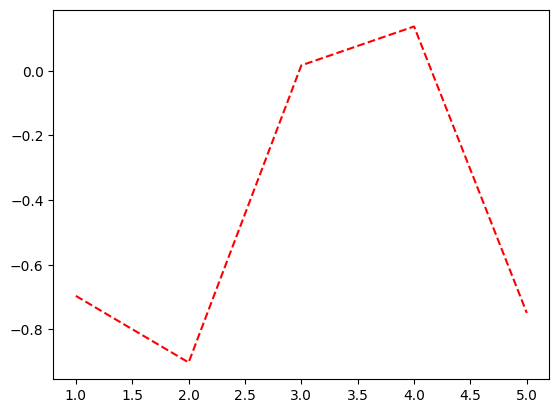

In [33]:
# 绘制y，默认x是0,1,2,...
x = np.arange(1,6)
y=np.random.randn(len(x))
plt.plot(x,y,'r--')

# 显示图像（在jupyter notebook中通常默认会显示，因此后续代码中会省略这一句）
plt.show()

<Figure size 640x480 with 0 Axes>

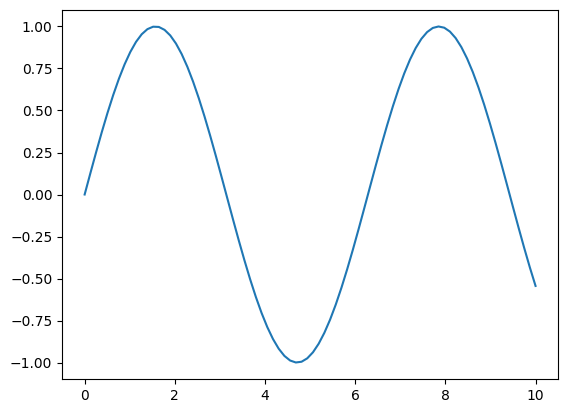

<Figure size 640x480 with 0 Axes>

In [28]:
# 同时指定x和y
x=np.linspace(0,10,80)
y=np.sin(x)
plt.plot(x,y)
plt.figure()


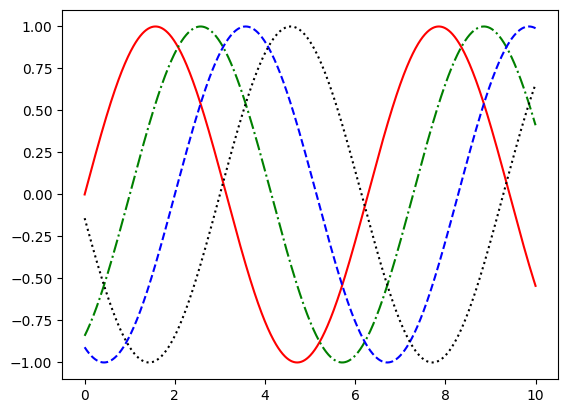

In [32]:
# 使用不同的样式
# 简单的样式是一个字符串，用[颜色]+[曲线类型]表示，曲线类型不写默认是直线
# 颜色：r/g/b/y/k 对应 红/绿/蓝/黄/黑
# 曲线类型："-." / "--" / ":" 对应 点划线/虚线/点线

x=np.linspace(0,10,1000)
plt.plot(x,np.sin(x),'r')
plt.plot(x,np.sin(x-1),'g-.')
plt.plot(x,np.sin(x-2),'b--')
plt.plot(x,np.sin(x-3),'k:')

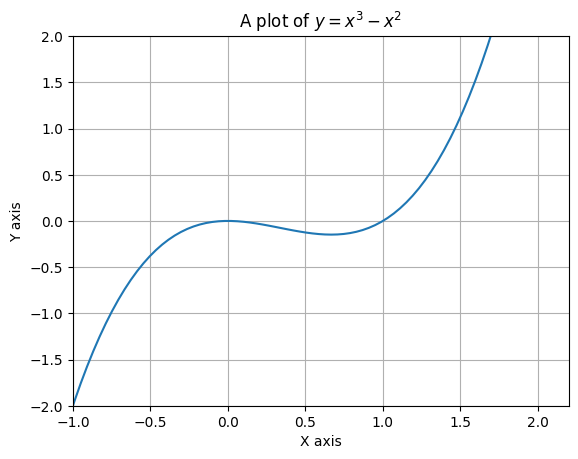

In [35]:
# 加标题
# 用$$可以写latex公式

x=np.linspace(-2,2,100)
plt.plot(x,x**3-x**2)
# 图表标题
plt.title('A plot of $y=x^3-x^2$')
# x轴标题
plt.xlabel('X axis')
# y轴标题
plt.ylabel('Y axis')

# 限制范围
# x的绘制范围
plt.xlim(-1,)
# y的绘制范围
plt.ylim(-2,2)

# 开启网格显示
plt.grid()

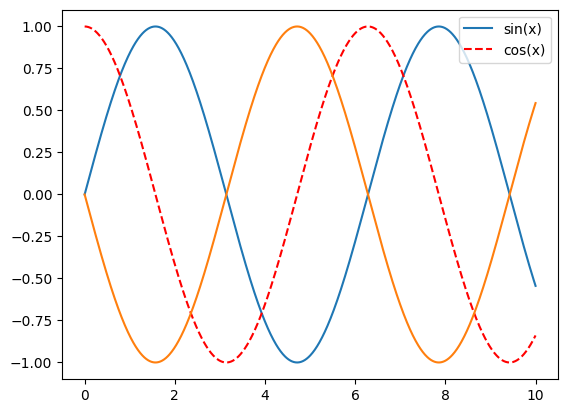

In [36]:
# 设置图例

x=np.linspace(0,10,1000)

# 注意下面写了label参数
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.cos(x),'r--',label='cos(x)')

# 注意下面没写label参数
plt.plot(x,-np.sin(x))

# 显示图例（没有加label参数的曲线不会出现在图例中）
plt.legend()

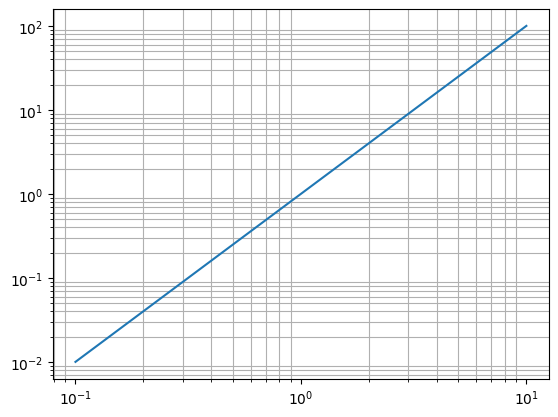

In [40]:
# 使用对数坐标

x=np.linspace(0.1,10,100)
y=x*x
plt.plot(x,y)

# x使用对数坐标
plt.xscale('log')

# y使用对数坐标
plt.yscale('log')

# 在大小刻度上都显示网格
plt.grid(which='minor')

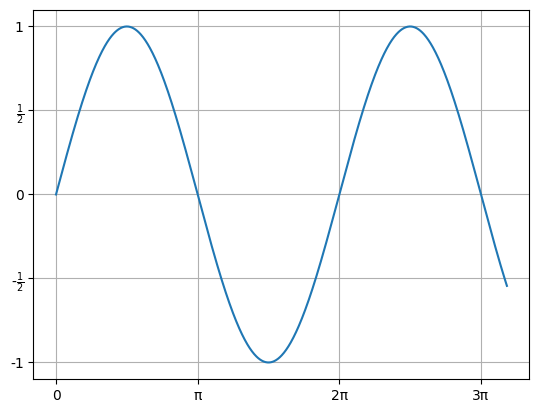

In [41]:
# 自定义刻度位置和文本
x=np.linspace(0,10,1000)
plt.plot(x,np.sin(x))
# x轴刻度位置和文本
plt.xticks([0,np.pi,2*np.pi,3*np.pi],['0','π','2π','3π'])
# y轴
plt.yticks([-1,-0.5,0,0.5,1],['-1',r'-$\frac{1}{2}$','0',r'$\frac{1}{2}$','1'])
plt.grid()

In [ ]:
# 让xy轴比例相等
x=np.linspace(-1,1,2)
plt.plot(x,x)

plt.axis('equal') # x和y的单位长度相等（比例相同）

plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid()

#### 填充

In [ ]:
x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)

# 填充曲线和x轴之间的区域
plt.fill_between(x,y1)

In [ ]:
# 填充两条曲线之间的区域
plt.fill_between(x,y1,y2)

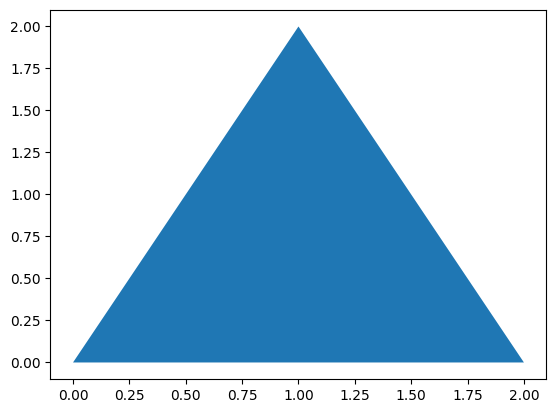

In [42]:
# 填充封闭曲线
plt.fill(
    [0,2,1],
    [0,0,2]
)

#### 绘制散点图

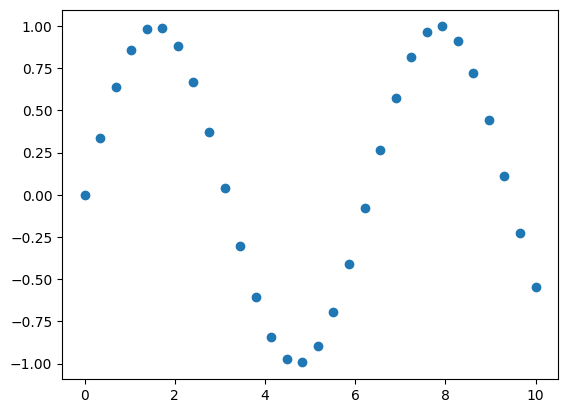

In [43]:
x=np.linspace(0,10,30)
y=np.sin(x)
plt.scatter(x,y)

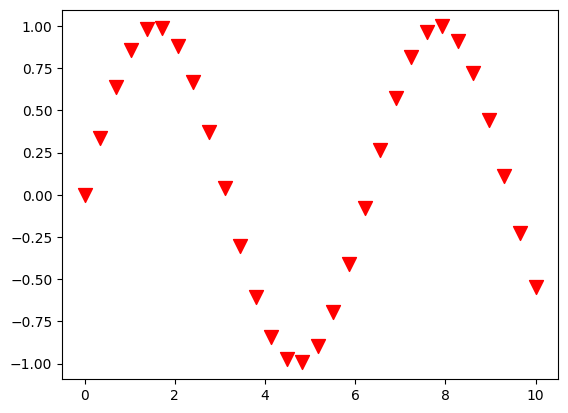

In [44]:
# 设置不同格式
plt.scatter(
    x,
    y,
    s=100,       # 大小
    color='red', # 颜色
    marker='v',  # 图案，参见 https://matplotlib.org/stable/api/markers_api.html
)

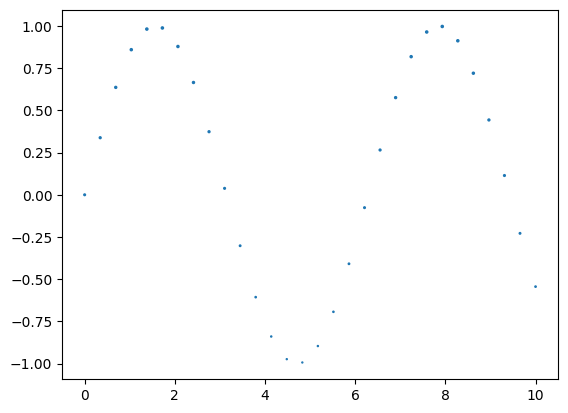

In [47]:
# 每个点的大小可以不同
x=np.linspace(0,10,30)
y=np.sin(x)
s=(1.5+np.sin(x))
plt.scatter(x,y,s)   # s参数控制大小

In [ ]:
# 每个点的颜色可以不同
x=np.linspace(0,10,30)
y=np.sin(x)

# 手动指定颜色
plt.scatter(x,y,color=['red','green','blue']*10)

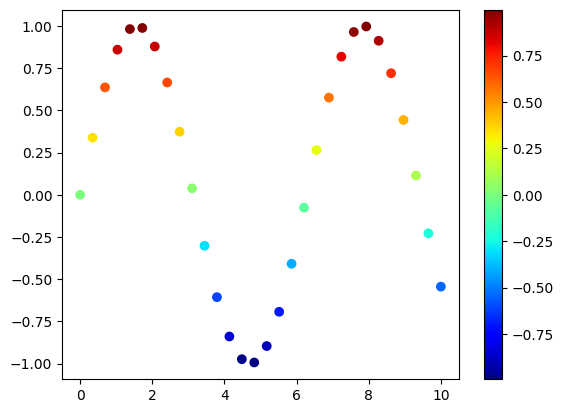

In [48]:
# 用数值表示颜色
# 具体的颜色取决于cmap(colormap)
# 常用的cmap有 jet彩虹色、gray黑白灰，更多选择参见 https://matplotlib.org/stable/users/explain/colors/colormaps.html
color_values=np.sin(x)
plt.scatter(
    x,
    y,
    c=color_values, # 数值颜色
    cmap='jet'
)

# 显示colormap
plt.colorbar()

#### 绘制柱状图

<BarContainer object of 3 artists>

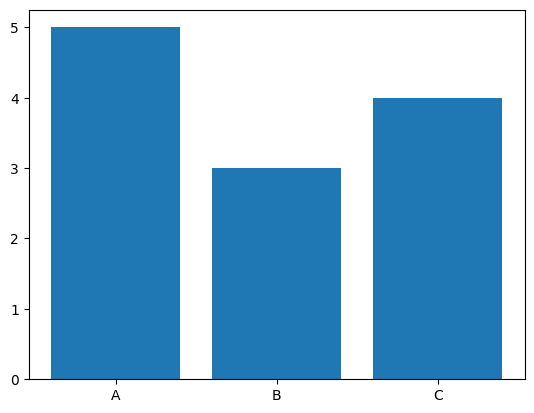

In [49]:
plt.bar(
    ['A','B','C'], # x可以是非数字
    [5,3,4]
)

#### 绘制直方图

(array([  6.,  22.,  75., 147., 224., 242., 181.,  79.,  20.,   3.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

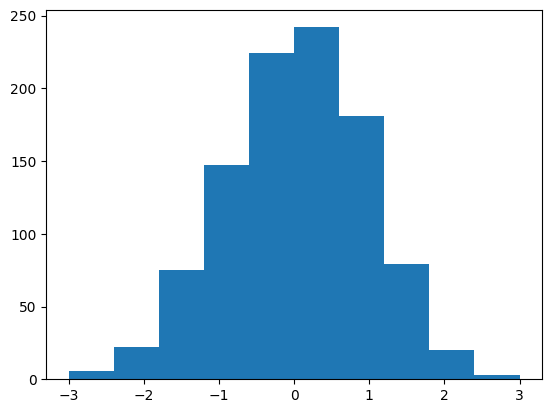

In [50]:
x=np.random.randn(1000)
plt.hist(
    x,
    range=(-3,3),   # 可选，指定数据范围
    bins=10,        # 可选，指定柱子个数
)

#### 绘制文本

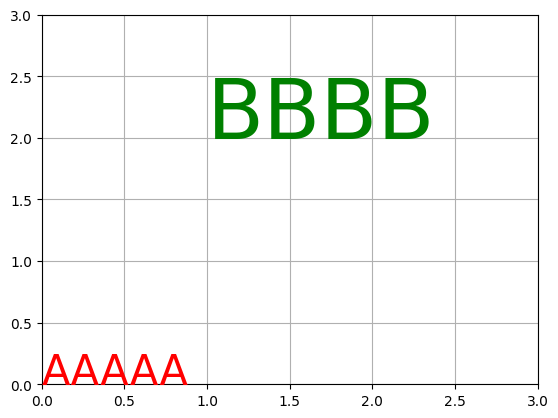

In [51]:
plt.text(
    0,0,        # 文本左下角坐标
    s='AAAAA',  # 文本内容
    size=30,    # 文本大小
    color='red' # 文本颜色
)

plt.text(
    1,2,          # 文本左下角坐标
    s='BBBB',     # 文本内容
    size=60,      # 文本大小
    color='green' # 文本颜色
)

# 它不会根据文本自动调整画面大小，需要我们手动设置
plt.xlim(0,3)
plt.ylim(0,3)

plt.grid()

#### 绘制图像

(747, 859, 3)
[0.45882353 0.73333333 0.99607843]


(-0.5, 858.5, 746.5, -0.5)

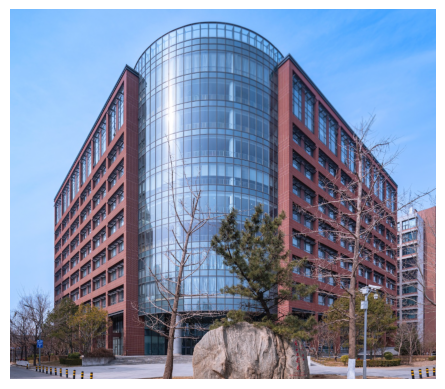

In [57]:
# 加载一张彩色图像
data=np.load('image.npy')
# 它的形状是 高x宽x3，3是因为它具有RGB三个颜色通道
print(data.shape)
print(data[1,1])
# 绘制
plt.imshow(data)
# 不显示坐标轴
plt.axis('off')

(747, 859)


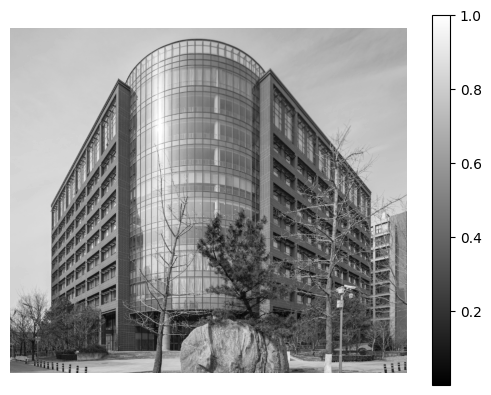

In [56]:
# 绘制单色图像

# 将数据转为单通道
x=data.mean(-1)
print(x.shape)

# 指定cmap
plt.imshow(x,cmap='gray')
plt.axis('off')
plt.colorbar()

#### 绘制多个子图

使用`plt.subplot(x,y,i)`函数设置当前的子图表位置

含义是，把当前的整个图切成`x`行`y`列，在第`i`块的位置绘制子图，`i`**从1开始计数**

可以结合下面的例子理解

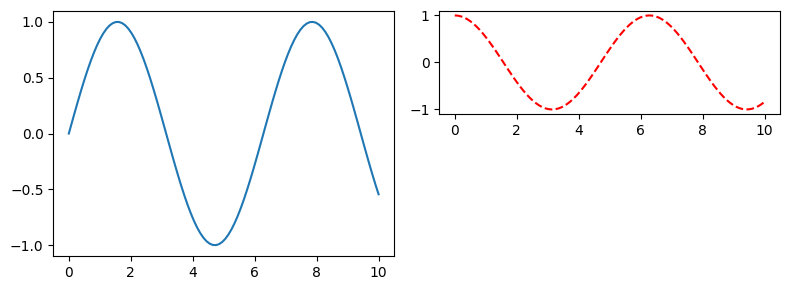

In [60]:
x=np.linspace(0,10,100)

# 1行2列中的第1个
plt.subplot(1,2,1)
plt.plot(x,np.sin(x))

# 2行2列中的第2个
plt.subplot(2,2,2)
plt.plot(x,np.cos(x),'r--')

# 调整整体尺寸，宽为8，高为3
plt.gcf().set_size_inches(8,3)

# 自动调整间距
plt.tight_layout()

解释如下图所示：

![image](./fig1.png)

想重叠也是可以的

In [ ]:
x=np.linspace(0,10,100)

# 1行3列中的第2个
plt.subplot(1,3,2)
plt.plot(x,np.sin(x))

# 3行1列中的第2个
plt.subplot(3,1,2)
plt.plot(x,np.cos(x),'r--')

解释如下图所示：

![image](./images/fig2.png)

#### 保存图像

In [ ]:
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x))

# 保存为png图像
plt.savefig('test.png')
# 保存为pdf
plt.savefig('test.pdf')